In [83]:
import numpy as np
from skimage.transform import resize
from skimage.io import imsave
import pickle
from scipy.linalg import eig
from scipy.linalg import sqrtm
from numpy.linalg import inv
from numpy.linalg import svd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

## 5 a)

In [84]:
x_train = pickle.load(open( 'x_train.p', 'rb' ), encoding='latin1')
x_train = np.asarray(x_train)
x_train = x_train/255.0*2.0-1.0
x_train = x_train.reshape(x_train.shape[0],-1)
y_train = pickle.load(open( 'y_train.p', 'rb' ), encoding='latin1')
y_train = np.asarray(y_train)
y_train = y_train/255.0*2.0-1.0
y_train = y_train.reshape(y_train.shape[0],-1)

In [85]:
x_mean = np.sum(x_train,0)/np.size(x_train,0)
y_mean = np.sum(y_train,0)/np.size(y_train,0)
x_var = np.dot((x_train - x_mean).T,x_train - x_mean)/(np.size(x_train,0)-1)

y_var = np.dot((y_train - y_mean).T,y_train - y_mean)/(np.size(y_train,0)-1)
xy_var = np.dot((y_train - y_mean).T,x_train - x_mean)/(np.size(y_train,0)-1)
#y_train - y_mean
#np.size(x_train,0)

#plt.imshow(y_train[0]/255.0)
#plt.show()

## 5 b)

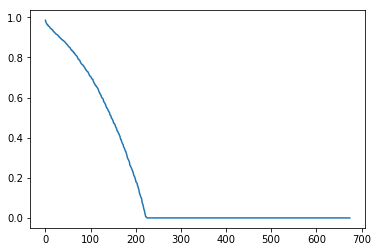

In [86]:
lamb = 0.00001
[U_x,D_x,V_x] = svd(x_var + lamb*np.eye(np.size(x_var,0)))
[U_y,D_y,V_y] = svd(y_var + lamb*np.eye(np.size(y_var,0)))

Ax = np.dot(np.dot(U_x,np.linalg.inv(sqrtm(np.diag(D_x)))),V_x)
Ay = np.dot(np.dot(U_y,np.linalg.inv(sqrtm(np.diag(D_y)))),V_y)
[U,D,V] = svd(np.dot(np.dot(Ax,xy_var.T),Ay))
plt.plot(range(np.size(D)),D)
plt.show()

## 5 c)

In [87]:
def plot_image(vector,string):
    vector = ((vector+ 1.0)/2.0)*255.0
    vector = np.reshape(vector, (15,15,3))
    p = vector.astype("uint8")
    p = resize(p, (100, 100), mode='reflect')
    #p = cv2.resize(p,(100,100))
    count = 0
    imsave(string, p)

In [88]:
plot_image( x_mean + U[:,0],'eigen_face.png')

/Users/zhaoqingyang/anaconda/lib/python3.6/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


## 5 d)

In [89]:
x_test = pickle.load(open( 'x_test.p', 'rb' ), encoding='latin1')
x_test = np.asarray(x_test)
x_test = x_test/255.0*2.0-1.0
x_test = x_test.reshape(x_test.shape[0],-1)
y_test = pickle.load(open( 'y_test.p', 'rb' ), encoding='latin1')
y_test = np.asarray(y_test)
y_test = y_test/255.0*2.0-1.0
y_test = y_test.reshape(y_test.shape[0],-1)

x_test = x_test - x_mean
y_test = y_test - y_mean
kRange = list([0,50,100,150,200,250,300,350,400,450,500,650])
error = []
for k in kRange:
    B = np.dot(x_train - x_mean,U[:,:k + 1])
    B = np.dot(np.dot(np.linalg.inv(np.dot(B.T,B) + lamb*np.eye(np.size(B,1))),B.T),y_train-y_mean)
    error.append(np.linalg.norm(np.dot(np.dot(x_test,U[:,0:k + 1]),B) - y_test)**2)

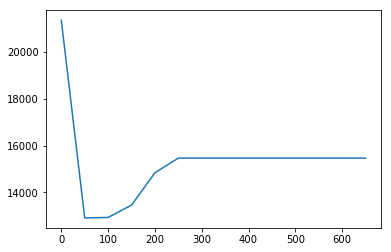

In [90]:
plt.plot(kRange,error)
plt.show()

## 5 e)

In [91]:
B = np.dot(x_train,U[:,:100 + 1])
B = np.dot(np.dot(np.linalg.inv(np.dot(B.T,B) + lamb*np.eye(np.size(B,1))),B.T),y_train)
preImg = np.dot(np.dot(x_test,U[:,0:100 + 1]),B)

plot_image(x_test[0,:] + x_mean,'test_0_bin.png')
plot_image(y_test[0,:] + y_mean,'test_0_gro.png')
plot_image(preImg[0,:] + y_mean,'test_0_pre.png')


plot_image(x_test[1,:] + x_mean,'test_1_bin.png')
plot_image(y_test[1,:] + y_mean,'test_1_gro.png')
plot_image(preImg[1,:] + y_mean,'test_1_pre.png')


plot_image(x_test[2,:] + x_mean,'test_2_bin.png')
plot_image(y_test[2,:] + y_mean,'test_2_gro.png')
plot_image(preImg[2,:] + y_mean,'test_2_pre.png')


plot_image(x_test[3,:] + x_mean,'test_3_bin.png')
plot_image(y_test[3,:] + y_mean,'test_3_gro.png')
plot_image(preImg[3,:] + y_mean,'test_3_pre.png')



/Users/zhaoqingyang/anaconda/lib/python3.6/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))
/Users/zhaoqingyang/anaconda/lib/python3.6/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))
/Users/zhaoqingyang/anaconda/lib/python3.6/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))
/Users/zhaoqingyang/anaconda/lib/python3.6/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))
/Users/zhaoqingyang/anaconda/lib/python3.6/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))
/Users/zhaoqing

## WHAT IF using Total Least Square?

In [92]:
def totalLeastSquare(featureMat, yLabel):
    # this function doing Total Least Square
    # featureMatrix is n by d, labels is n by m
    # the aim of total least square is to find the smallest error in both feature Matrix and labels
    # The model is Y - YNoise = (X - Xnoise)W
    # Solution for TLS:
    # svd([X Y]) = [U D V]
    # U = [Uxx Uxy], V = [Vxx Vxy]
    #     [Uyx Uyy]      [Vyx Vyy].T
    # w = 
    
    [U, D, V] = np.linalg.svd(np.append(featureMat, yLabel,axis = 1))
    V = V.T
    d = np.size(featureMat,1)
    n = np.size(featureMat,0)
    m = np.size(yLabel ,1)
    return -np.dot(V[0:d,d:d+m],np.linalg.inv(V[d:d+m,d:d+m]))

In [99]:
W = totalLeastSquare(x_train-x_mean, y_train-y_mean)
preImg1 = np.dot(x_test-x_mean,W)
plot_image( preImg1[1,:] + y_mean,'TLS_face.png')


/Users/zhaoqingyang/anaconda/lib/python3.6/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


AttributeError: module 'numpy' has no attribute 'imread'

# TLS will give a result out of range 0 - 255. It does not make sense because it will 